In [1]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import UnobservedComponents

from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.utils.plotting import plot_series

import pandas_datareader.data as web

# настройки визуализация
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)
# Не показывать ValueWarning, ConvergenceWarning из statsmodels
from statsmodels.tools.sm_exceptions import ValueWarning, ConvergenceWarning
warnings.simplefilter('ignore', category=ValueWarning)
warnings.simplefilter('ignore', category=ConvergenceWarning)

<Axes: xlabel='DATE'>

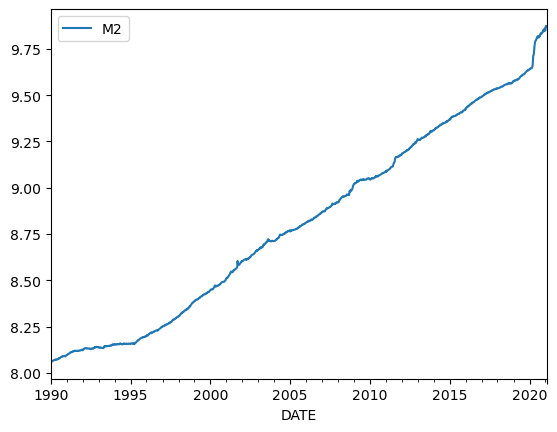

In [2]:
m2 = web.DataReader(name='M2', data_source='fred', start='1990-01-01')
y = np.log(m2)
y.plot()

In [3]:
# Выбираем какие компоненты включить в модель
mod = UnobservedComponents(y, level=True, trend=True, seasonal=4, cycle=False, stochastic_level=True, stochastic_trend=True, stochastic_seasonal=True, stochastic_cycle=True)
res = mod.fit()

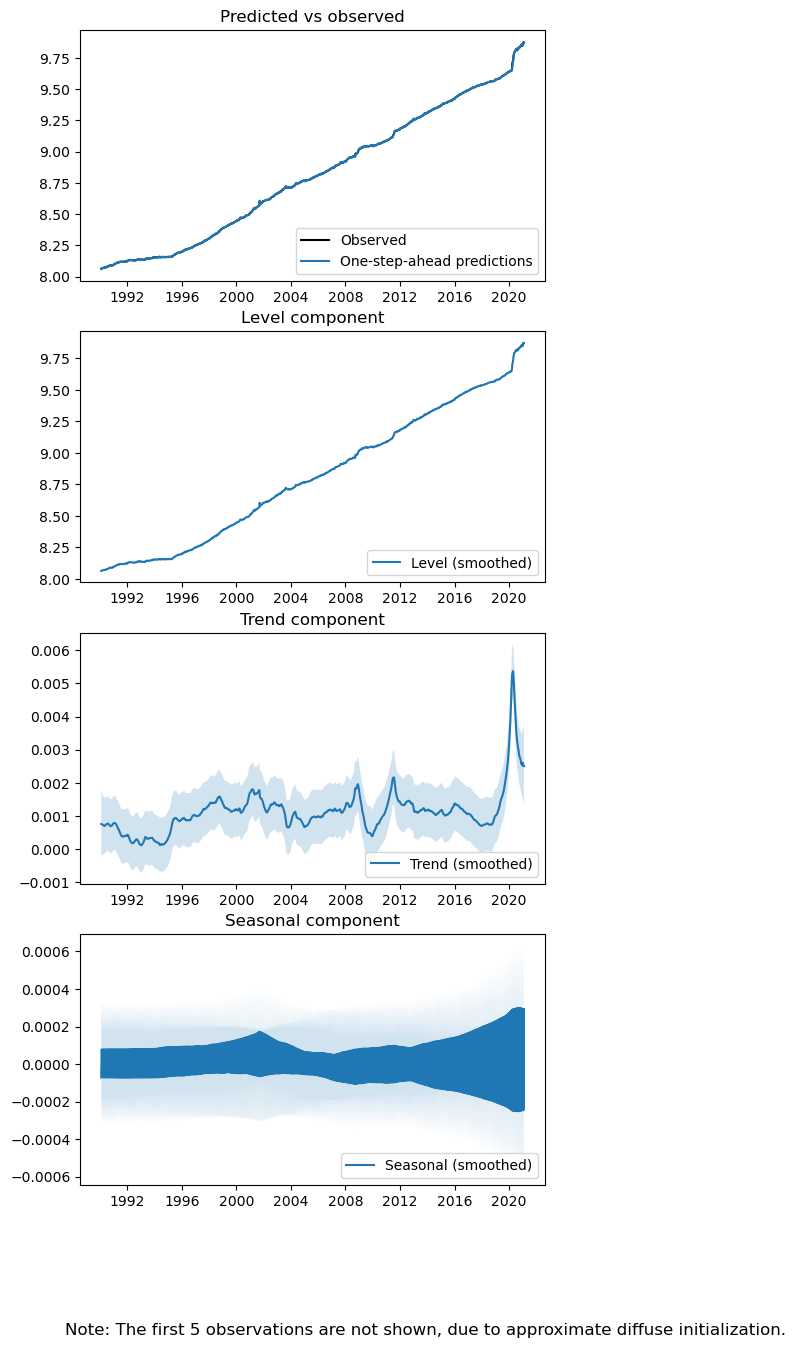

In [4]:

# визуализация компонент
fig = res.plot_components(figsize=(6, 15))

# изменим положение легенды для каждого подграфика
for i in range(4):
	fig.axes[i].legend(loc=4)
plt.show()

In [5]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Unobserved Components Results                            
====================================================================================
Dep. Variable:                           M2   No. Observations:                 1623
Model:                                 None   Log Likelihood                7498.108
                   + stochastic seasonal(4)   AIC                         -14990.216
Date:                      Mon, 21 Apr 2025   BIC                         -14974.049
Time:                              22:13:26   HQIC                        -14984.216
Sample:                          01-01-1990                                         
                               - 02-01-2021                                         
Covariance Type:                        opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
sigma2.level     5.077e-06   4.96e-08    102.454      0.000    4.98e-06    5.17e-06
sigma2.trend     2.377e-08    2.3e-09     10.349      0.000    1.93e-08    2.83e-08
sigma2.seasonal  2.398e-11   5.35e-10      0.045      0.964   -1.02e-09    1.07e-09
===================================================================================
Ljung-Box (L1) (Q):                  17.75   Jarque-Bera (JB):             94199.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.08   Skew:                             2.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        39.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

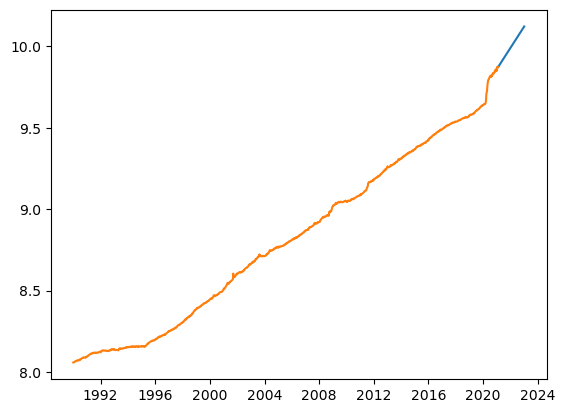

In [6]:
# Визуализация прогноза
plt.plot(res.forecast(steps=100))
plt.plot(y)
plt.show()

In [7]:
forecaster = ARIMA(order=(1,1,1), seasonal_order=(1,1,1,6), trend='n')
forecaster.fit(y)
forecaster.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1623
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                7372.498
Date:                           Mon, 21 Apr 2025   AIC                         -14734.997
Time:                                   22:13:32   BIC                         -14708.058
Sample:                               01-01-1990   HQIC                        -14724.998
                                    - 02-01-2021                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5091      0.089     -5.714      0.000      -0.684      -0.335
ma.L1          0.6146      0.088      6.961      0.000       0.442       0.788
ar.S.L6       -0.0356      0.023     -1.518      0.129      -0.081       0.010
ma.S.L6       -0.6819      0.020    -34.390      0.000      -0.721      -0.643
sigma2      6.362e-06   6.04e-08    105.393      0.000    6.24e-06    6.48e-06
===================================================================================
Ljung-Box (L1) (Q):                   1.53   Jarque-Bera (JB):             62192.89
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               3.78   Skew:                             2.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        33.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""